In [5]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import scale

In [15]:
# df = pd.read_csv("train.csv")
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/train.csv")

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### As we can see there are missing values, we are going to fill the missing values first.

In [10]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# 
# # Since the data is not numerical we can not pick strategy of taking the mean value
# # So I simply took the most frequent 1
# inserter = SimpleImputer(strategy="most_frequent")
# df[['Product_Category_2', 'Product_Category_3']] = inserter.fit_transform(df[['Product_Category_2', 'Product_Category_3']])
# 
# # Encoding the non-numerical data
# # df_encoded = pd.get_dummies(df, columns=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'])
# # df_encoded

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,10,0,3,8.0,16.0,8370,True,False,...,False,False,True,False,False,False,False,True,False,False
1,1000001,P00248942,10,0,1,6.0,14.0,15200,True,False,...,False,False,True,False,False,False,False,True,False,False
2,1000001,P00087842,10,0,12,8.0,16.0,1422,True,False,...,False,False,True,False,False,False,False,True,False,False
3,1000001,P00085442,10,0,12,14.0,16.0,1057,True,False,...,False,False,True,False,False,False,False,True,False,False
4,1000002,P00285442,16,0,8,8.0,16.0,7969,False,True,...,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,13,1,20,8.0,16.0,368,False,True,...,True,False,False,True,False,False,True,False,False,False
550064,1006035,P00375436,1,0,20,8.0,16.0,371,True,False,...,False,False,False,False,True,False,False,False,True,False
550065,1006036,P00375436,15,1,20,8.0,16.0,137,True,False,...,False,False,False,True,False,False,False,False,False,True
550066,1006038,P00375436,1,0,20,8.0,16.0,365,True,False,...,False,True,False,False,True,False,False,True,False,False


In [16]:
df_gr = df.groupby("User_ID").agg({"Product_ID" : "nunique", "Purchase" : "sum"}).rename(columns={'Purchase' : "Total"})

df_gr

,Product_ID,Total
User_ID,,
1000001,35,334093
1000002,77,810472
1000003,29,341635
1000004,14,206468
1000005,106,821001
...,...,...
1006036,514,4116058
1006037,122,1119538
1006038,12,90034


### Plotting for the seeing purchase total and purchase count

Text(0, 0.5, 'Total')

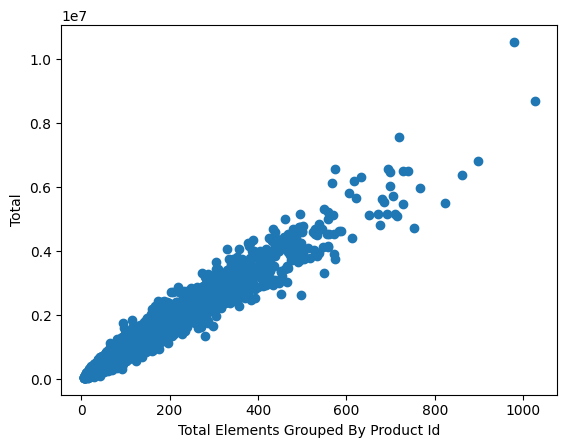

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df_gr["Product_ID"], df_gr["Total"])
plt.xlabel('Total Elements Grouped By Product Id')
plt.ylabel('Total')

## We will use KMeans methodology for unsupervised learning

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = df_gr
x[x.columns] = scale(x[x.columns])

from sklearn.cluster import KMeans

mdlKmcRtc = KMeans(n_clusters=3, random_state=1)
mdlKmcRtc.fit(x)
kMeans_labels = mdlKmcRtc.labels_

from sklearn.cluster import KMeans

mdlKmcRtc = KMeans(n_clusters=3, random_state=1)
mdlKmcRtc.fit(x)
kMeans_labels = mdlKmcRtc.labels_


#### Displaying k-means cluster on scatter plot

Text(0, 0.5, 'Total')

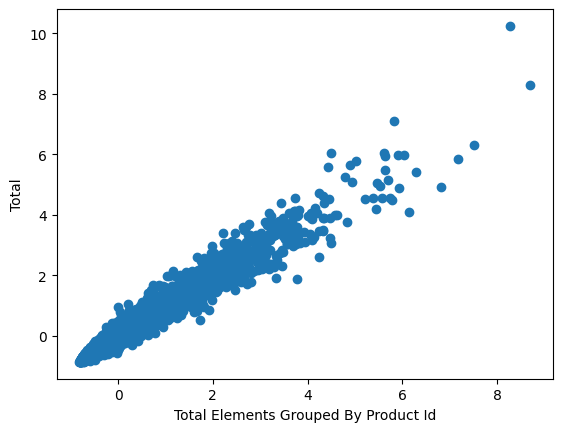

In [21]:
plt.scatter(x["Product_ID"], x["Total"])
plt.xlabel('Total Elements Grouped By Product Id')
plt.ylabel('Total')

## We need to find silhouette score since it is not a supervised learning to measure our programs success

In [22]:
from sklearn.metrics import silhouette_score

silhouette_score(x, mdlKmcRtc.labels_)

np.float64(0.6652767061197826)

In [23]:
def cluster_kMeans(X, k):
    mdlKmcRtc = KMeans(n_clusters=k, random_state=1)
    mdlKmcRtc.fit(X)
    kMeans_labels = mdlKmcRtc.labels_
    kMeans_sil_score = silhouette_score(X, mdlKmcRtc.labels_)
    return (kMeans_labels, kMeans_sil_score)

In [25]:
for k in [2, 3, 4, 5, 6]:
    kMeans_labels, kMeans_sil_score = cluster_kMeans(x,k)
    print('k: ',k,'\t\t', 'Silhouette Score: ', kMeans_sil_score)

k:  2 		 Silhouette Score:  0.7261408452722743
k:  3 		 Silhouette Score:  0.6652767061197826
k:  4 		 Silhouette Score:  0.6136716528629251
k:  5 		 Silhouette Score:  0.5976738041512231
k:  6 		 Silhouette Score:  0.5749165002005857


### Higher the Silhouette Score better the value so k equals to is the best

# Hierarchical Clustering 

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

for k in [2,3,4,5,6,7,8,9,10]:
    mdlHrcRtc = AgglomerativeClustering(n_clusters=k)
    mdlHrcRtc.fit(x)
    hClust_labels = mdlHrcRtc.labels_
    print(f" Silhouette Score for {k} -> ", silhouette_score(x, mdlHrcRtc.labels_))


 Silhouette Score for 2 ->  0.7454258816188774
 Silhouette Score for 3 ->  0.6415136338507116
 Silhouette Score for 4 ->  0.6399901867458228
 Silhouette Score for 5 ->  0.506267207431757
 Silhouette Score for 6 ->  0.5070500323467254
 Silhouette Score for 7 ->  0.49619253901507826
 Silhouette Score for 8 ->  0.4869920696040333
 Silhouette Score for 9 ->  0.4827761823236659
 Silhouette Score for 10 ->  0.4830097565263201


## Checking For Anomalies

In [39]:
from sklearn.cluster import DBSCAN

mdlDbsRtc = DBSCAN(eps=0.2)
mdlDbsRtc.fit(x)
dbscan_labels = mdlDbsRtc.labels_
silhouette_score(x, dbscan_labels)

np.float64(0.6568861530009427)

In [42]:
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(dbscan_clusters)

dbscan_anomalies = list(dbscan_labels).count(-1)
dbscan_anomalies

4


60

Text(0.5, 1.0, 'DBScan Clustering')

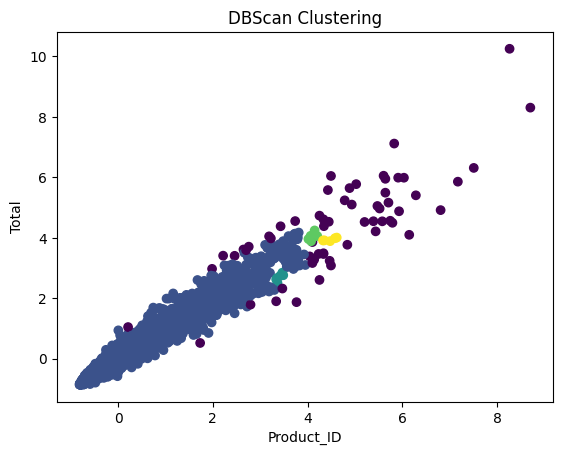

In [43]:
plt.scatter(x['Product_ID'],x['Total'],c=dbscan_labels)
plt.xlabel('Product_ID')
plt.ylabel('Total')
plt.title('DBScan Clustering')

In [45]:
def cluster_dbscan(X, e):
    mdlDbsRtc = DBSCAN(eps=e)
    mdlDbsRtc.fit(X)
    dbscan_labels = mdlDbsRtc.labels_
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    
    # count number of clusters and noise points
    dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    dbscan_anomalies = list(dbscan_labels).count(-1)
    return(dbscan_clusters, dbscan_anomalies, dbscan_sil_score)

for eps in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    dbscan_clusters, dbscan_anomalies, dbscan_sil_score = cluster_dbscan(x, eps)
    print('eps: ',eps,'\t', 'Clusters: ', dbscan_clusters, '\t', 'Noise: ', dbscan_anomalies, '\t', 'Silhouette Score: ', dbscan_sil_score)

eps:  0.1 	 Clusters:  10 	 Noise:  255 	 Silhouette Score:  0.5661972006437398
eps:  0.2 	 Clusters:  4 	 Noise:  60 	 Silhouette Score:  0.6568861530009427
eps:  0.3 	 Clusters:  1 	 Noise:  40 	 Silhouette Score:  0.8024435045110658
eps:  0.4 	 Clusters:  3 	 Noise:  20 	 Silhouette Score:  0.7872811055480032
eps:  0.5 	 Clusters:  3 	 Noise:  15 	 Silhouette Score:  0.7927236996940684
eps:  0.6 	 Clusters:  3 	 Noise:  7 	 Silhouette Score:  0.7943119387842261
eps:  0.7 	 Clusters:  2 	 Noise:  6 	 Silhouette Score:  0.8011975322057426


## Takeaways

* In the K-Means and Hierarchical Clustering, 2 clusters always comes up as better silhoutte score. This shows that customers in generally divides in 2 categories when they are shopping. 
* When we made anomally detection which means finding out what are the odd customer behaviours, we can see that anomalies are not occur too much which shows customers behaviour mostly consistent